## Plant Disease Detection Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Projects/Plant_Disease_Dataset.zip'  # <- UPDATE THIS
extract_to = '/content/plant_disease_dataset'  # or any folder you want

In [ ]:
import zipfile
import os

# Make directory to extract if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

#### Data Preprocessing

##### Training image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


##### Validation image processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
for X, y in training_set:
    print(X.shape, y.shape)
    break

(32, 128, 128, 3) (32, 38)


#### Building Model

In [ ]:

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
## building convolution layer
# First and Second Convolutional Layer (Conv2D) with ReLU activation, followed by MaxPooling layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(128, 128, 3)))  # 32 filters, 3x3 kernel size
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=(1, 1)))  # 32 filters, 3x3 kernel size
# pooling layer
model.add(MaxPooling2D((2, 2), strides=2))  # Max pooling layer (2x2 pool size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# third and fourth Convolutional Layer (Conv2D) with ReLU activation, followed by MaxPooling layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))  # 32 filters, 3x3 kernel size
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=(1, 1)))  # 32 filters, 3x3 kernel size
# pooling layer
model.add(MaxPooling2D((2, 2), strides=2))  # Max pooling layer (2x2 pool size)

In [ ]:
# fifth and sixth Convolutional Layer (Conv2D) with ReLU activation, followed by MaxPooling layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))  # 32 filters, 3x3 kernel size
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=(1, 1)))  # 32 filters, 3x3 kernel size
# pooling layer
model.add(MaxPooling2D((2, 2), strides=2))  # Max pooling layer (2x2 pool size)

In [ ]:
# seventh and eight Convolutional Layer (Conv2D) with ReLU activation, followed by MaxPooling layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))  # 32 filters, 3x3 kernel size
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1, 1)))  # 32 filters, 3x3 kernel size
# pooling layer
model.add(MaxPooling2D((2, 2), strides=2))  # Max pooling layer (2x2 pool size)

In [ ]:
# nineth and tenth Convolutional Layer (Conv2D) with ReLU activation, followed by MaxPooling layer
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))  # 32 filters, 3x3 kernel size
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', strides=(1, 1)))  # 32 filters, 3x3 kernel size
# pooling layer
model.add(MaxPooling2D((2, 2), strides=2))  # Max pooling layer (2x2 pool size)  # Max pooling layer (2x2 pool size)

In [ ]:
model.add(Dropout(0.25)) # droping 25% from the convolutional layers to avoid overfitting

In [ ]:
# Flatten the output from the convolutional layers before passing it to the dense (fully connected) layers
model.add(Flatten())

In [ ]:
# Fully connected layer (Dense layer) with 1024 units
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.2)) # droping 20% from the convolutional layers to avoid overfitting

In [ ]:
# Output layer (for 38-class classification)
model.add(Dense(units=38, activation='softmax'))


#### Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

##### To avoid overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be a chance of underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there maybe prossibilities that model is unable to capture relevant features or model is confusing due to lack of feature so feed with more features

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 162s 67ms/step - accuracy: 0.4289 - loss: 2.0312 - val_accuracy: 0.8547 - val_loss: 0.4575
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.8502 - loss: 0.4711 - val_accuracy: 0.9122 - val_loss: 0.2718
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9102 - loss: 0.2813 - val_accuracy: 0.9258 - val_loss: 0.2258
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9377 - loss: 0.1885 - val_accuracy: 0.9322 - val_loss: 0.2172
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 60ms/step - accuracy: 0.9525 - loss: 0.1404 - val_accuracy: 0.9615 - val_loss: 0.1214
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9640 - loss: 0.1060 - val_accuracy: 0.9540 - val_loss: 0.1564
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9721 - loss: 0.0855 - val_accuracy: 0.9537 - val_loss: 0.1579
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 

In [ ]:
# Check if TPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num TPUs Available: ", len(tf.config.experimental.list_physical_devices('TPU')))

Num GPUs Available:  1
Num TPUs Available:  0


#### Model Evaluation

In [ ]:
#Model Evaluation on Training set
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9829 - loss: 0.0560


In [ ]:
print(f"Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")

Training Loss: 0.03396608680486679, Training Accuracy: 0.9882779717445374


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9506 - loss: 0.1636


In [ ]:
print(f"Training Loss: {val_loss}, Training Accuracy: {val_accuracy}")

Training Loss: 0.1596197932958603, Training Accuracy: 0.954245388507843


#### Saving our model

In [ ]:
#saving with h5 extension
model.save('/content/drive/MyDrive/plant_disease_model.h5')

In [ ]:
#saving with keras extension
model.save('/content/drive/MyDrive/plant_disease_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.6399174928665161,
  0.8693079352378845,
  0.9201223254203796,
  0.9429831504821777,
  0.9577352404594421,
  0.9651895761489868,
  0.9729852676391602,
  0.9762714505195618,
  0.9805676341056824,
  0.9812788963317871],
 'loss': [1.2100121974945068,
  0.4057176113128662,
  0.24526982009410858,
  0.17311127483844757,
  0.12919969856739044,
  0.10432105511426926,
  0.08305603265762329,
  0.07215174287557602,
  0.058466892689466476,
  0.05722270905971527],
 'val_accuracy': [0.828761637210846,
  0.8969952464103699,
  0.919986367225647,
  0.9340428113937378,
  0.9515137672424316,
  0.9326200485229492,
  0.9613589644432068,
  0.9605622291564941,
  0.9517983198165894,
  0.9594240784645081],
 'val_loss': [0.5282253623008728,
  0.31001928448677063,
  0.25167158246040344,
  0.20608478784561157,
  0.15348422527313232,
  0.2250594049692154,
  0.12283986061811447,
  0.12544111907482147,
  0.1678338497877121,
  0.13517698645591736]}

In [ ]:
#Recoring History in json
import json
with open('/content/plant_disease_dataset/Plant_Disease_Dataset/training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
#loadint the training history as a dataframe
train_h = pd.read_json('/content/plant_disease_dataset/Plant_Disease_Dataset/training_history.json')

In [ ]:
train_h

,accuracy,loss,val_accuracy,val_loss
0,0.627854,1.258666,0.854712,0.457474
1,0.869095,0.408679,0.912247,0.271759
2,0.918429,0.254415,0.925791,0.225848
3,0.942073,0.174889,0.932165,0.217215
4,0.956739,0.129011,0.961530,0.121442
5,0.965118,0.103354,0.954018,0.156393
6,0.974081,0.079693,0.953733,0.157944
7,0.975446,0.073442,0.964660,0.114416
8,0.980795,0.060454,0.965286,0.111302
9,0.982033,0.053461,0.954245,0.159620


#### Accuracy Visualiation

In [ ]:
epoch_index = train_h.index.values
epoch_index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

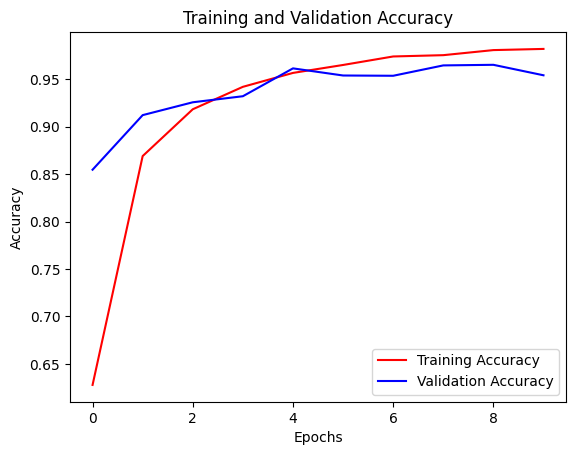

In [ ]:
#plotting just the training accuracy and the visualization accuracy
plt.plot(epoch_index, train_h['accuracy'], color='red', label='Training Accuracy')
plt.plot(epoch_index, train_h['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

<Axes: >

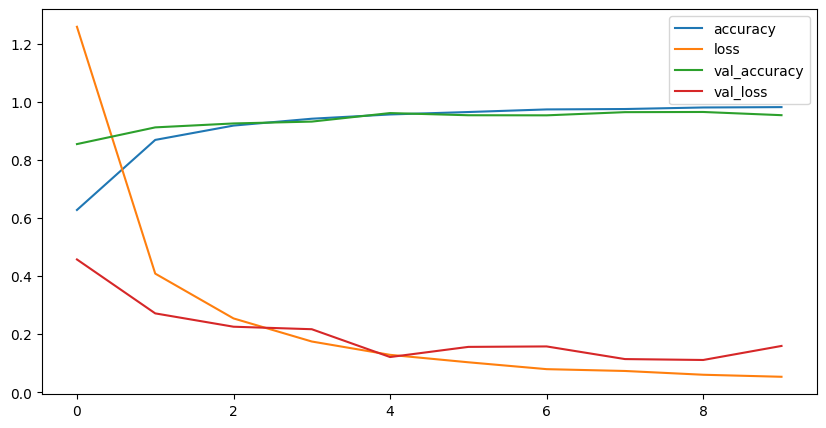

In [ ]:
#plotting the train_h against the index
train_h.plot(figsize=(10, 5))


#### Some other metics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


In [ ]:
print(y_pred)

[[9.9999905e-01 1.9397089e-07 1.4299996e-12 ... 4.4858857e-18
  5.3219037e-17 2.7668506e-13]
 [9.9998915e-01 1.0053491e-05 1.4906255e-10 ... 1.3224263e-17
  4.7004227e-14 4.6508791e-12]
 [1.0000000e+00 1.9490209e-09 2.7433036e-15 ... 2.6285562e-22
  1.6785252e-19 5.5614423e-17]
 ...
 [1.9786573e-12 1.6032564e-18 9.3448925e-13 ... 2.7175458e-15
  1.6189174e-16 1.0000000e+00]
 [7.4966193e-11 1.3619032e-16 1.1085515e-11 ... 1.7966911e-12
  9.4299900e-14 1.0000000e+00]
 [1.7096685e-17 1.7384144e-17 2.6819636e-15 ... 3.8247678e-14
  2.3023003e-13 9.9999976e-01]]


In [ ]:
y_pred.shape

(17572, 38)

In [ ]:
predicted_categories = np.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

array([ 0,  0,  0, ..., 37, 37, 37])

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.89      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.97      0.88      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.94      0.91       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.86      0.

In [ ]:
cm = confusion_matrix(Y_true, predicted_categories)

In [ ]:
cm

array([[450,   5,   0, ...,   0,   0,   0],
       [  1, 494,   0, ...,   0,   0,   0],
       [  3,   0, 419, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

#### visualization of the confusion matrics

Text(0.5, 1.0, 'Plant Disease Prediction Confusion Matrix')

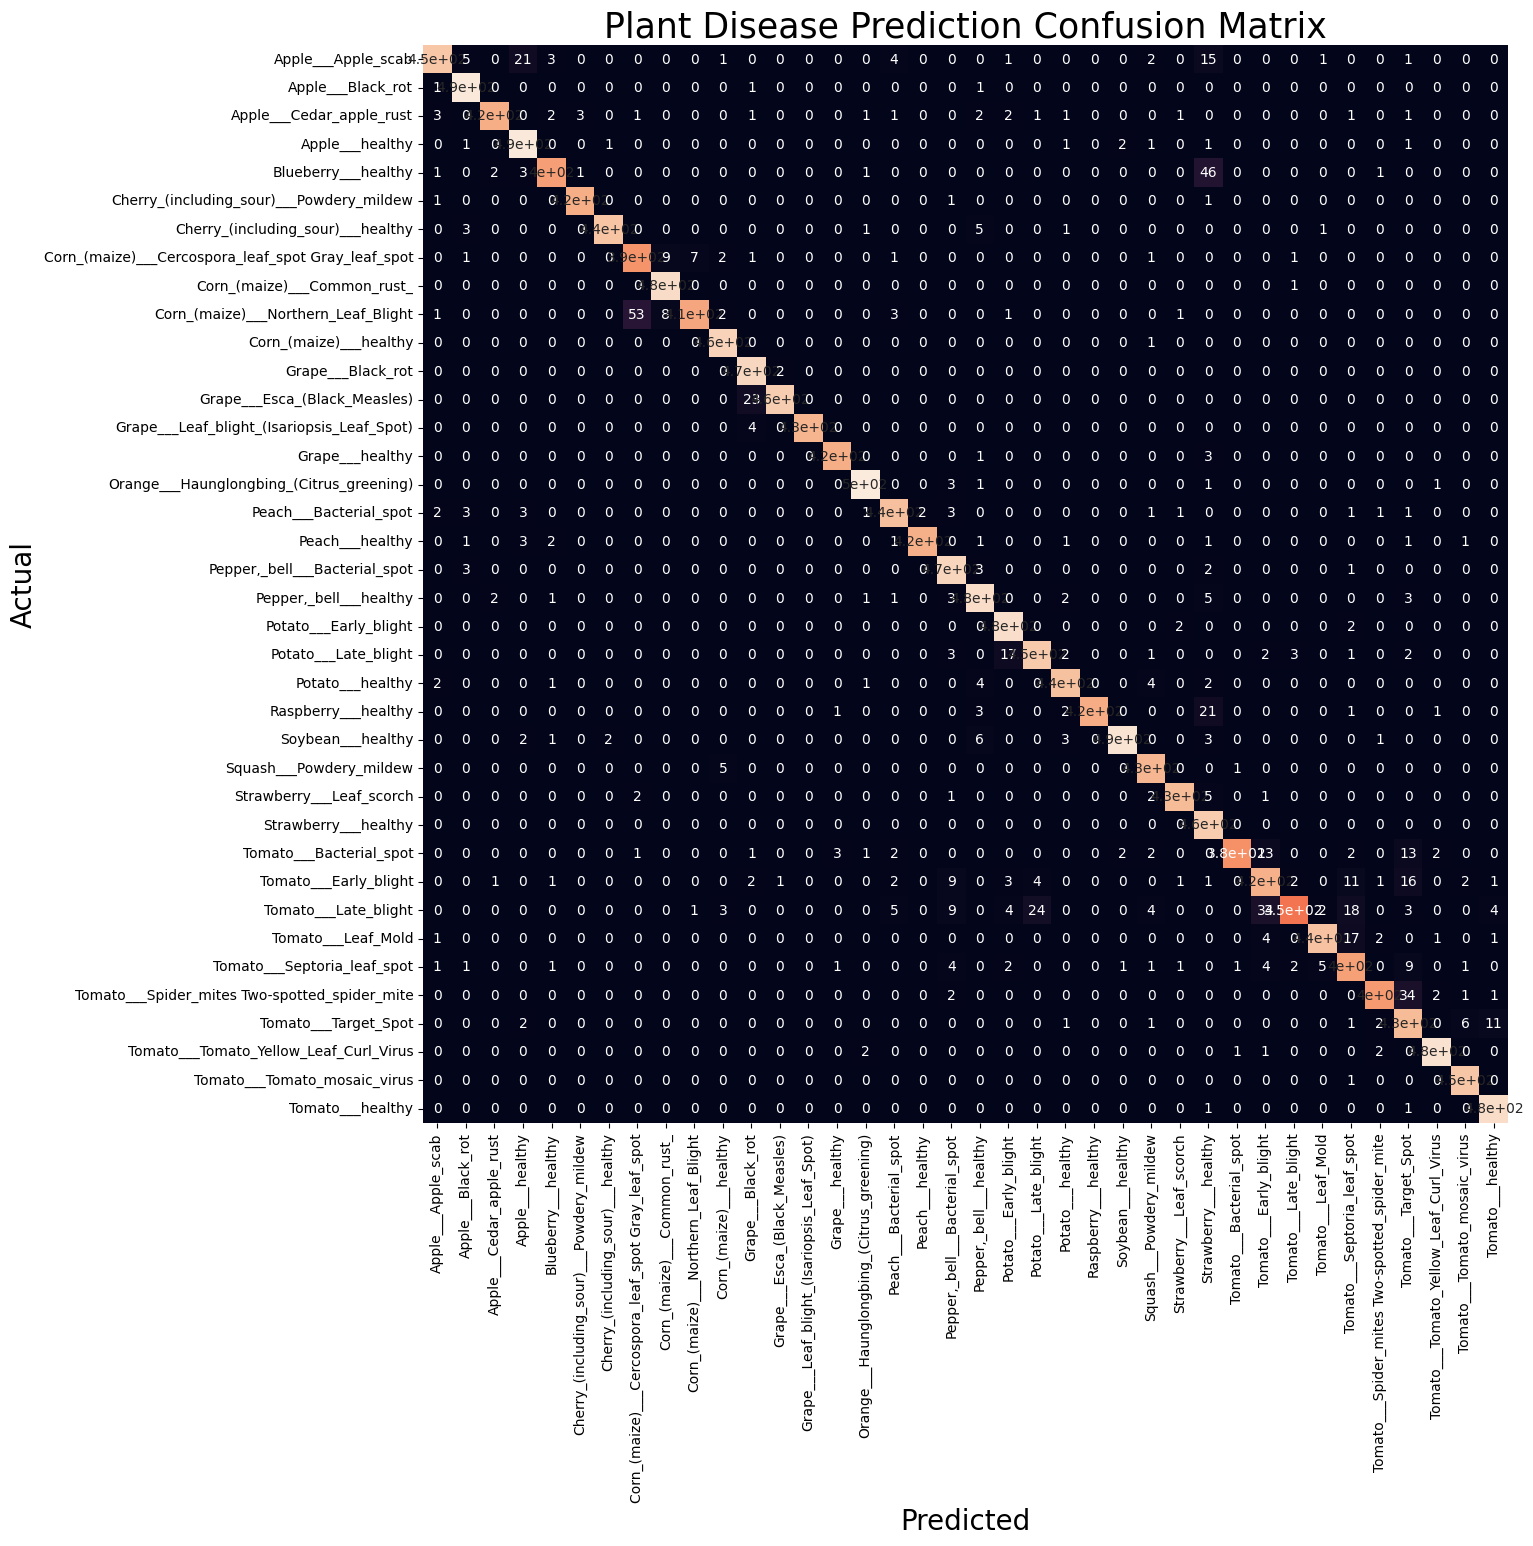

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(cm, annot=True, annot_kws={'size':10}, cbar=False, xticklabels=class_name, yticklabels=class_name)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)

#### improving the model accuracy:

1. add more dense layers
2. perform data augmentation
3. Normalizing our dataset image


### Testing with Testing set

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Visualization Single Image of Test set

In [ ]:
import cv2

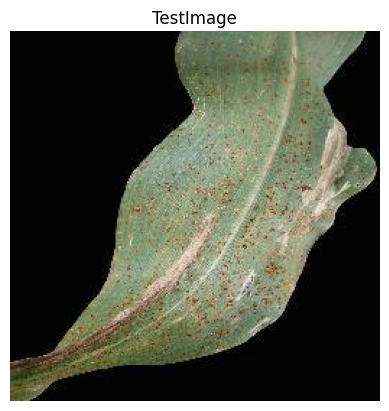

In [ ]:
image_path = '/content/plant_disease_dataset/Plant_Disease_Dataset/test/test/CornCommonRust1.JPG'

#reading image
img = cv2.imread(image_path)
# converting from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#displaying image
plt.imshow(img)
plt.title('TestImage')
plt.axis('off')
plt.show()

### Testing Model

In [ ]:
#preprocessing our image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))

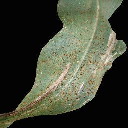

In [ ]:
image

In [93]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [94]:
input_arr = np.array([input_arr]) # converting the image into batch
input_arr.shape

(1, 128, 128, 3)

In [95]:
prediction = model.predict(input_arr)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[4.3844431e-13, 9.7467011e-13, 2.7685342e-15, 5.6233104e-12,
        3.8369906e-15, 4.1957591e-15, 2.7372955e-13, 1.7164940e-10,
        9.9999988e-01, 4.1227444e-15, 3.5228323e-16, 6.6080223e-19,
        3.0518974e-17, 2.8563037e-18, 3.5777399e-21, 1.7963521e-15,
        8.9477469e-16, 3.1996026e-19, 2.5144541e-12, 1.2222958e-12,
        6.6504434e-08, 2.3228241e-17, 9.3695117e-15, 3.9295885e-21,
        3.3105278e-18, 7.2000057e-17, 1.3654047e-15, 4.0652011e-20,
        3.7131311e-20, 2.3745640e-13, 5.4337079e-10, 4.6001590e-18,
        1.8868513e-17, 1.8470985e-24, 1.1925898e-17, 8.8286112e-22,
        2.8220919e-24, 7.2351135e-16]], dtype=float32)

In [96]:
result_index = np.argmax(prediction)
result_index

np.int64(8)

In [97]:
#displaying result of disease prediction
class_name[result_index]

'Corn_(maize)___Common_rust_'

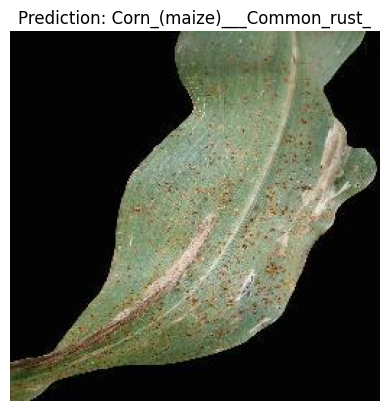

In [98]:
plt.imshow(img)
plt.title(f'Prediction: {class_name[result_index]}')
plt.axis('off')
plt.show()